# Medical Insurance


The medical insurance dataset is a dataset that contains information about individuals and their medical insurance costs. The dataset includes demographic information such as age, sex, and BMI (body mass index), as well as geographic information such as region of residence. It also includes information about the individual's smoking habits and the number of children they have.

The dataset is often used for predictive modeling and analysis to help insurance companies better understand their clients and how different factors may influence the cost of medical insurance. It can also be used for research purposes to explore the relationships between various factors and the cost of medical insurance.

Here is a list of the columns in the medical insurance dataset:

    age: age of the individual
    sex: sex of the individual (male or female)
    bmi: body mass index of the individual
    children: number of children the individual has
    smoker: whether the individual is a smoker (yes or no)
    region: the region of residence of the individual (northeast, southeast, southwest, or northwest)
    charges: the medical insurance cost for the individual

<b>Contents</b>
1. Import Required Librarys
2. Loading dataset
3. Exploratory Data Analysis
4. Data Visualization
5. Feature Engineering
6. Machine Learning Algorythms
7. Model Validation

# 1. Import Required Librarys

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from scipy import stats
from scipy.stats import boxcox
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.svm import LinearSVR
from sklearn.linear_model import Lasso, Ridge, LinearRegression
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import accuracy_score, r2_score, mean_absolute_error
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler, PowerTransformer, QuantileTransformer
from sklearn.compose import TransformedTargetRegressor, ColumnTransformer
from functions import distribution_plot,residual_plot, qq_plot, model_score
import pickle
import warnings
warnings.simplefilter(action='ignore')

%matplotlib inline

plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True)
plt.rc('axes', labelsize=12, titlesize=16)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)
plt.rc('legend', fontsize=14)
plt.rc('lines', markersize='8', markeredgecolor='blue', markerfacecolor='white', markeredgewidth=1, linewidth=2)

# 2. Loading dataset

In [5]:
df = pd.read_csv('dataset/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# 3. Exploratory Data Analysis

## a. Understanding dataset

In [6]:
df.shape

(1338, 7)

In [7]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [9]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

## b. Cleaning dataset

In [10]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [11]:
df = df.drop_duplicates()

In [12]:
df['age_ind'] = pd.qcut(df.age,3, labels=['low', 'middle', 'high'])
df['bmi_ind'] = pd.qcut(df.bmi,3, labels=['low', 'middle', 'high'])


In [13]:
df_clean = df.copy()

# 4. Data Visualization

In [14]:
children = df_clean.groupby(by=df_clean.children)['children'].count()
smoker = df_clean.groupby(by=df_clean.smoker)['smoker'].count()



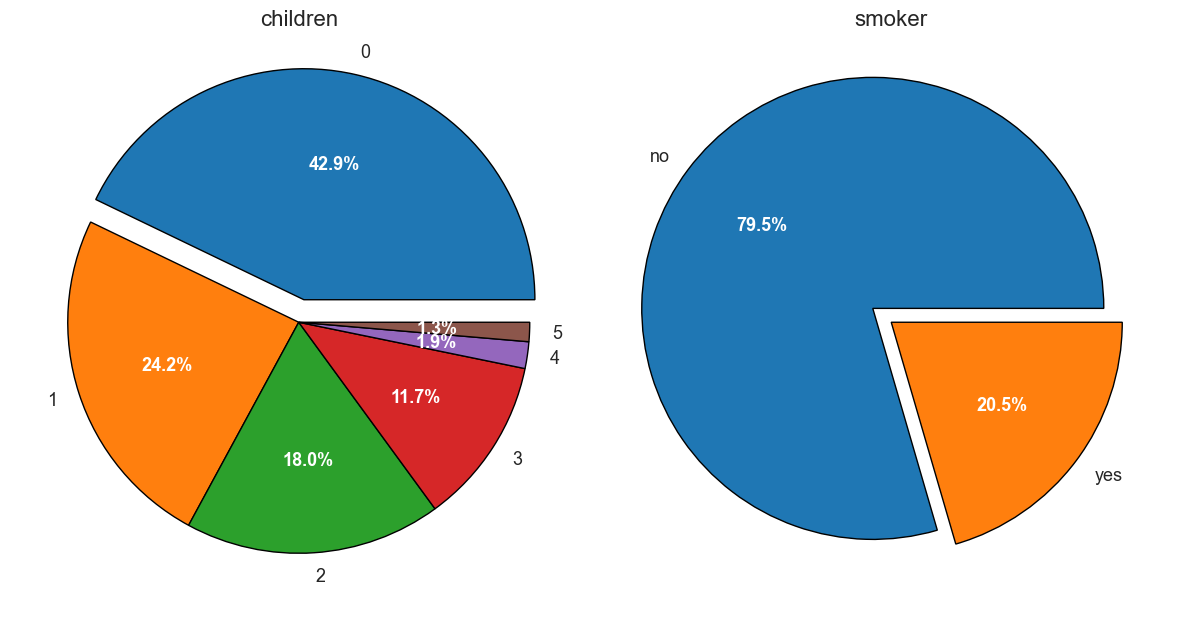

In [15]:
fig, ax = plt.subplots(figsize=(12,7))
features = [children, smoker]
for ind, feature in enumerate(features):
    exp = np.zeros(len(feature.index))
    exp[0] = 0.1
    ax = plt.subplot(1,2,ind+1)
    wedge, text, autotext = ax.pie(feature, autopct='%.1f%%' ,labels=list(feature.index), explode=exp)
    plt.setp(autotext,size=13, color='white', weight='bold')
    plt.setp(wedge, edgecolor='black', linewidth=1)
    plt.setp(text, fontsize=13)
    ax.set_title(feature.name)


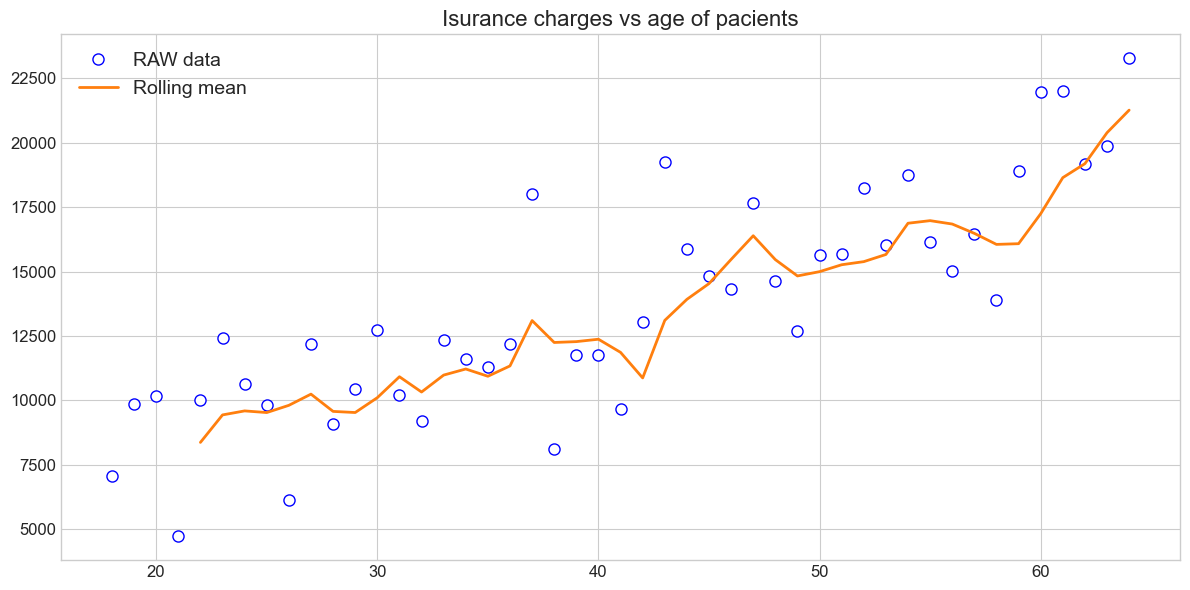

In [16]:
charges = df_clean.groupby(by='age').mean()['charges']
fig,ax = plt.subplots(figsize=(12,6))
ax.plot(charges.index, charges, 'o', label='RAW data')
ax.plot(charges.index, charges.rolling(5).mean(), label='Rolling mean')
ax.set_title('Isurance charges vs age of pacients')
plt.legend()


(0.0, 60000.0)

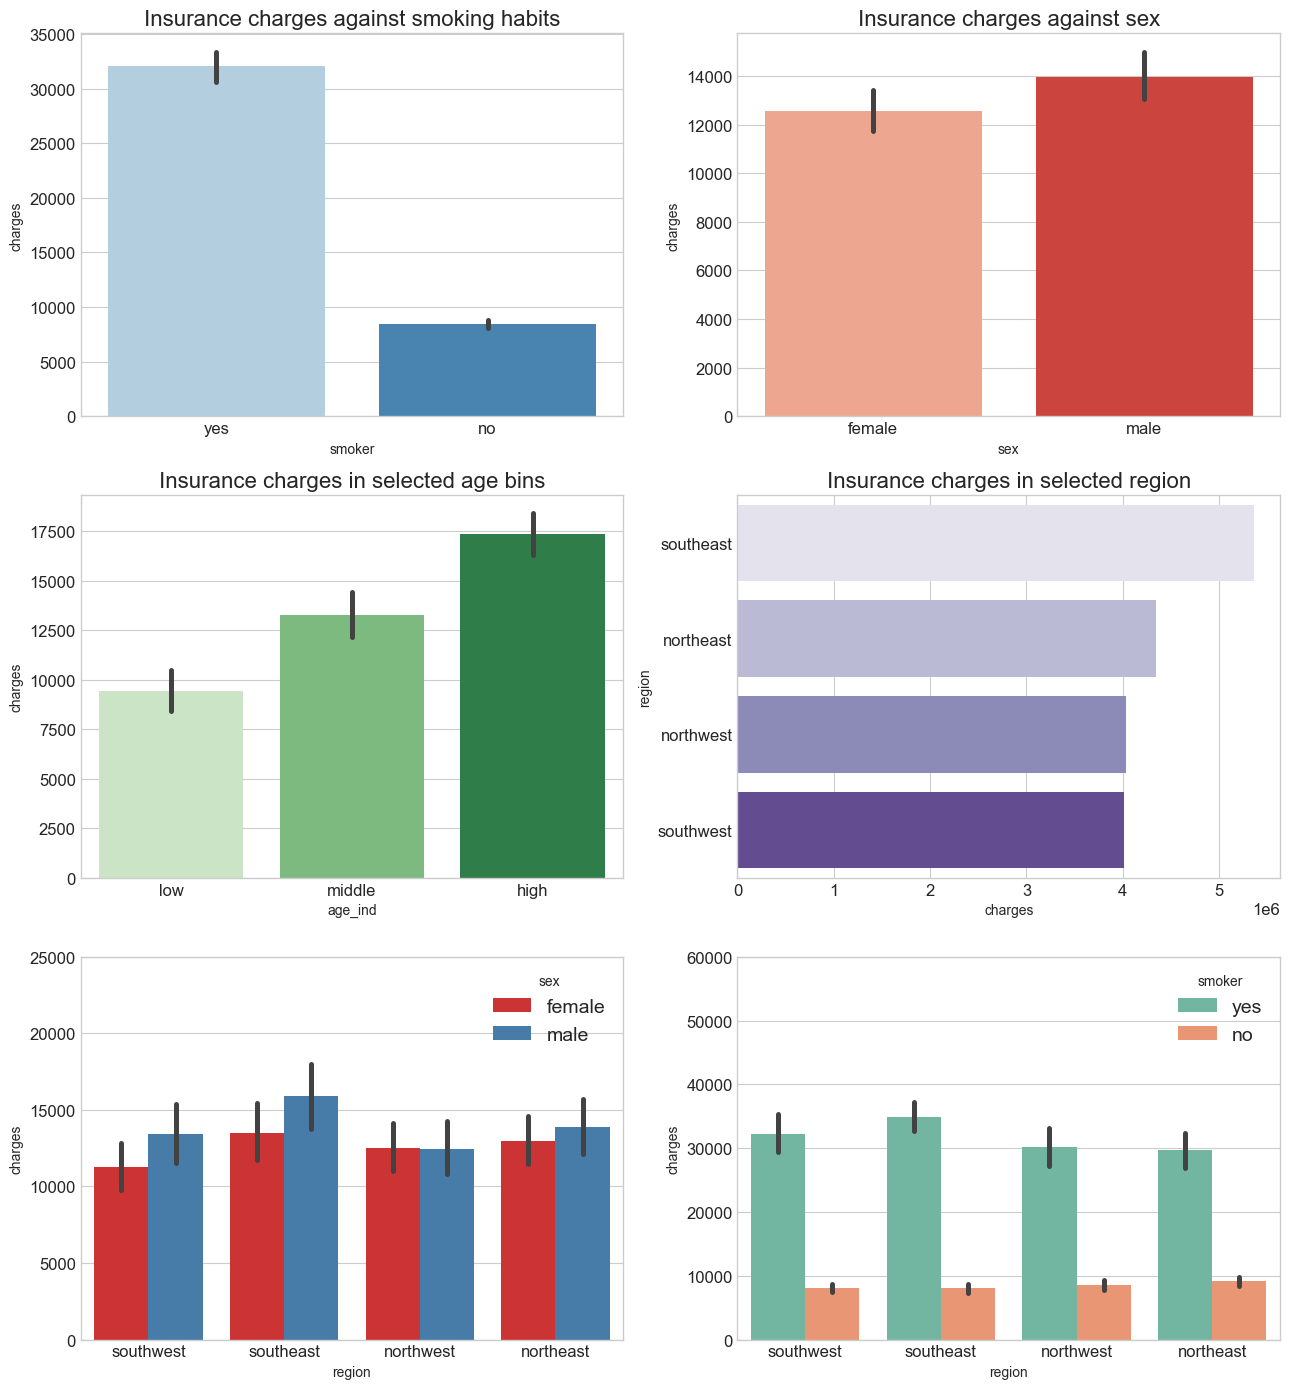

In [17]:
fig, ((ax0, ax1), (ax2, ax3), (ax4, ax5)) = plt.subplots(3,2,figsize=(13,14))
sns.barplot(data=df_clean,x='smoker', y='charges',palette='Blues',ax=ax0)
ax0.set_title('Insurance charges against smoking habits')
sns.barplot(data=df_clean, x='sex', y='charges', palette='Reds', ax=ax1)
ax1.set_title('Insurance charges against sex')
sns.barplot(data=df_clean, x='age_ind', y='charges',ax=ax2, palette='Greens')
ax2.set_title('Insurance charges in selected age bins')
charges = df_clean['charges'].groupby(df['region']).sum().sort_values(ascending=False)
sns.barplot(x=charges, y=charges.index, palette='Purples', ax=ax3)
ax3.set_title('Insurance charges in selected region')
sns.barplot(data=df_clean, x='region', y='charges',hue='sex', palette='Set1',ax=ax4)
ax4.set_ylim(0,25000)
sns.barplot(data=df_clean, x='region', y='charges',hue='smoker', palette='Set2',ax=ax5)
ax5.set_ylim(0,60000)


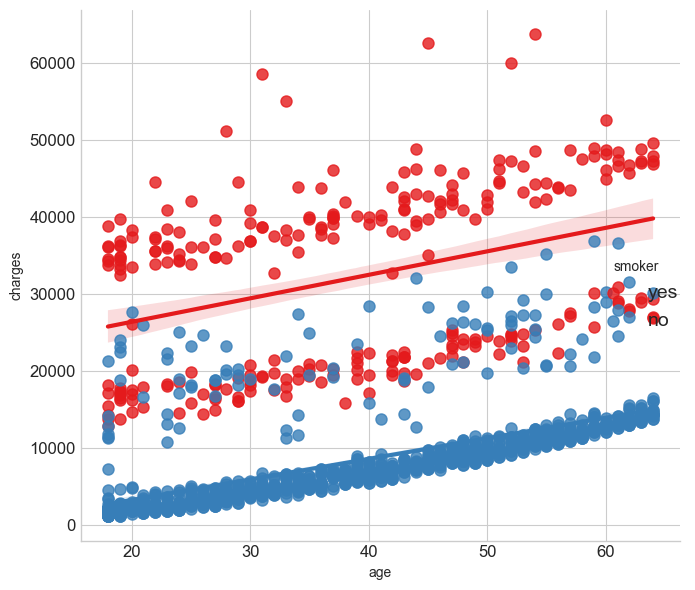

In [18]:
sns.lmplot(data=df_clean, x='age', y='charges', hue='smoker', palette='Set1' ,height=6)

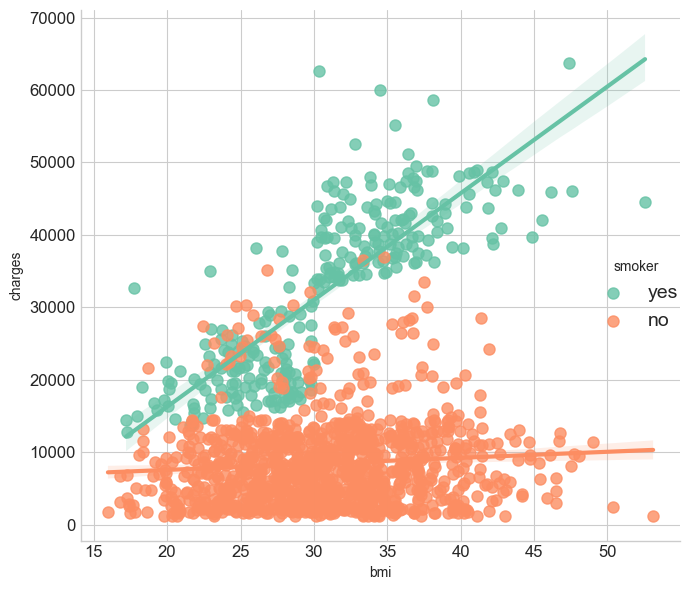

In [19]:
sns.lmplot(data=df_clean, x='bmi', y='charges', hue='smoker', palette='Set2' ,height=6)

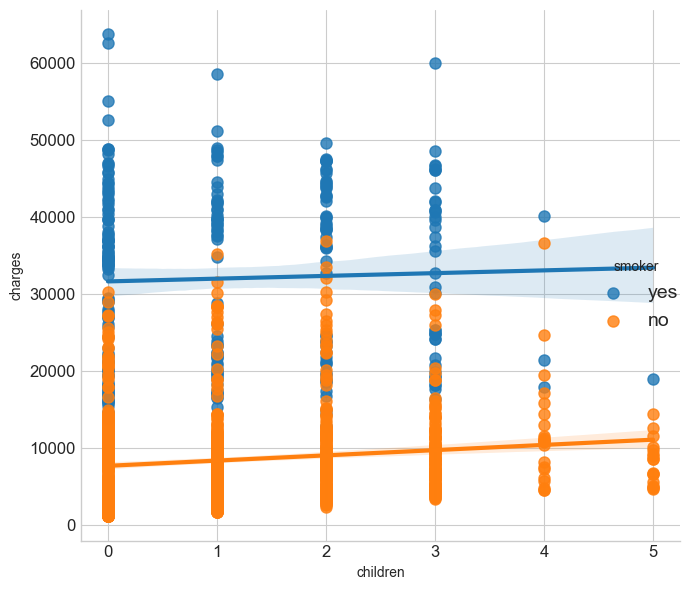

In [20]:
sns.lmplot(data=df_clean, x='children', y='charges', hue='smoker', palette='tab10' ,height=6)

<Axes: xlabel='children', ylabel='charges'>

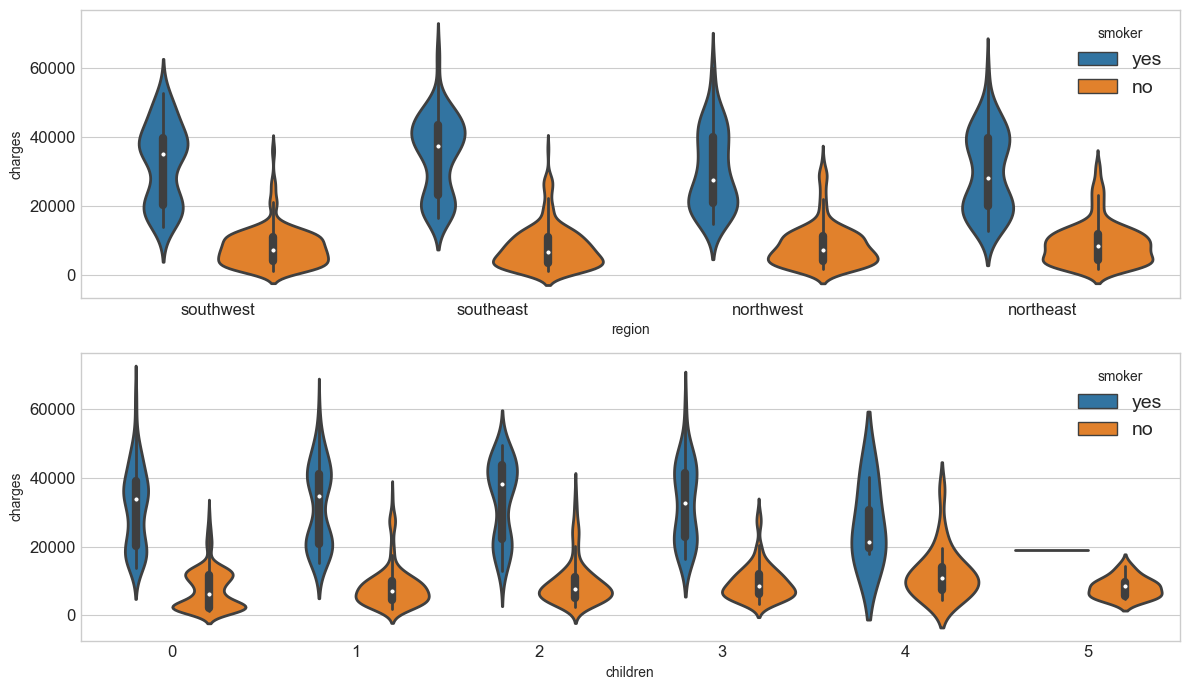

In [21]:
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(12,7))
sns.violinplot(data=df_clean, x='region', y='charges', hue='smoker', ax=ax1)
sns.violinplot(data=df_clean, x='children', y='charges', hue='smoker', ax=ax2)


# 5. Feature Engineering

## a. Label Encoding of Categorical Features

In [22]:
df_clean[['sex','smoker', 'region', 'children']]= df_clean[['sex','smoker', 'region', 'children']].astype('category')

In [23]:
cat_features = df_clean.select_dtypes(include=['category'])

In [24]:
le = LabelEncoder()
for feature in cat_features:
    df_clean[feature] = le.fit_transform(df[feature])

In [25]:
df_clean.head()

,age,sex,bmi,children,smoker,region,charges,age_ind,bmi_ind
0,19,0,27.900,0,1,3,16884.92400,1,2
1,18,1,33.770,1,0,2,1725.55230,1,0
2,28,1,33.000,3,0,2,4449.46200,1,2
3,33,1,22.705,0,0,1,21984.47061,2,1
4,32,1,28.880,0,0,1,3866.85520,2,2


## b. Feature Selection

<Axes: >

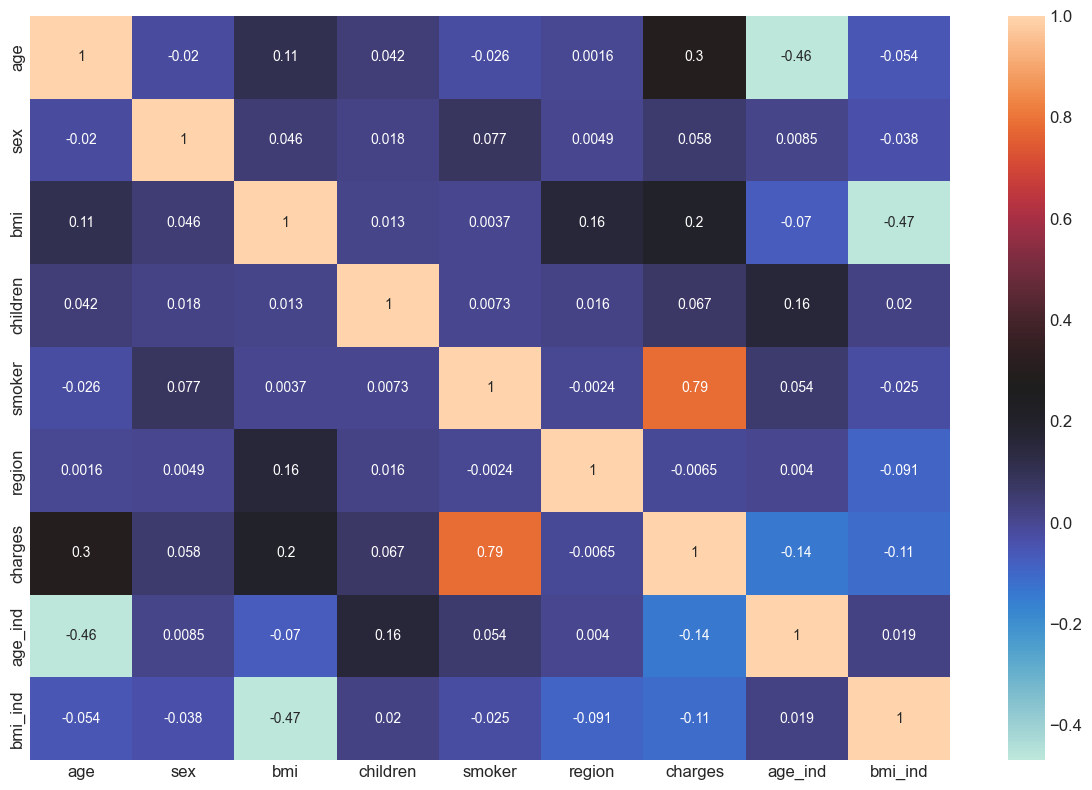

In [26]:
fig, ax = plt.subplots(figsize=(12,8))
sns.heatmap(df_clean.corr(), ax=ax, annot=True, cmap='icefire')

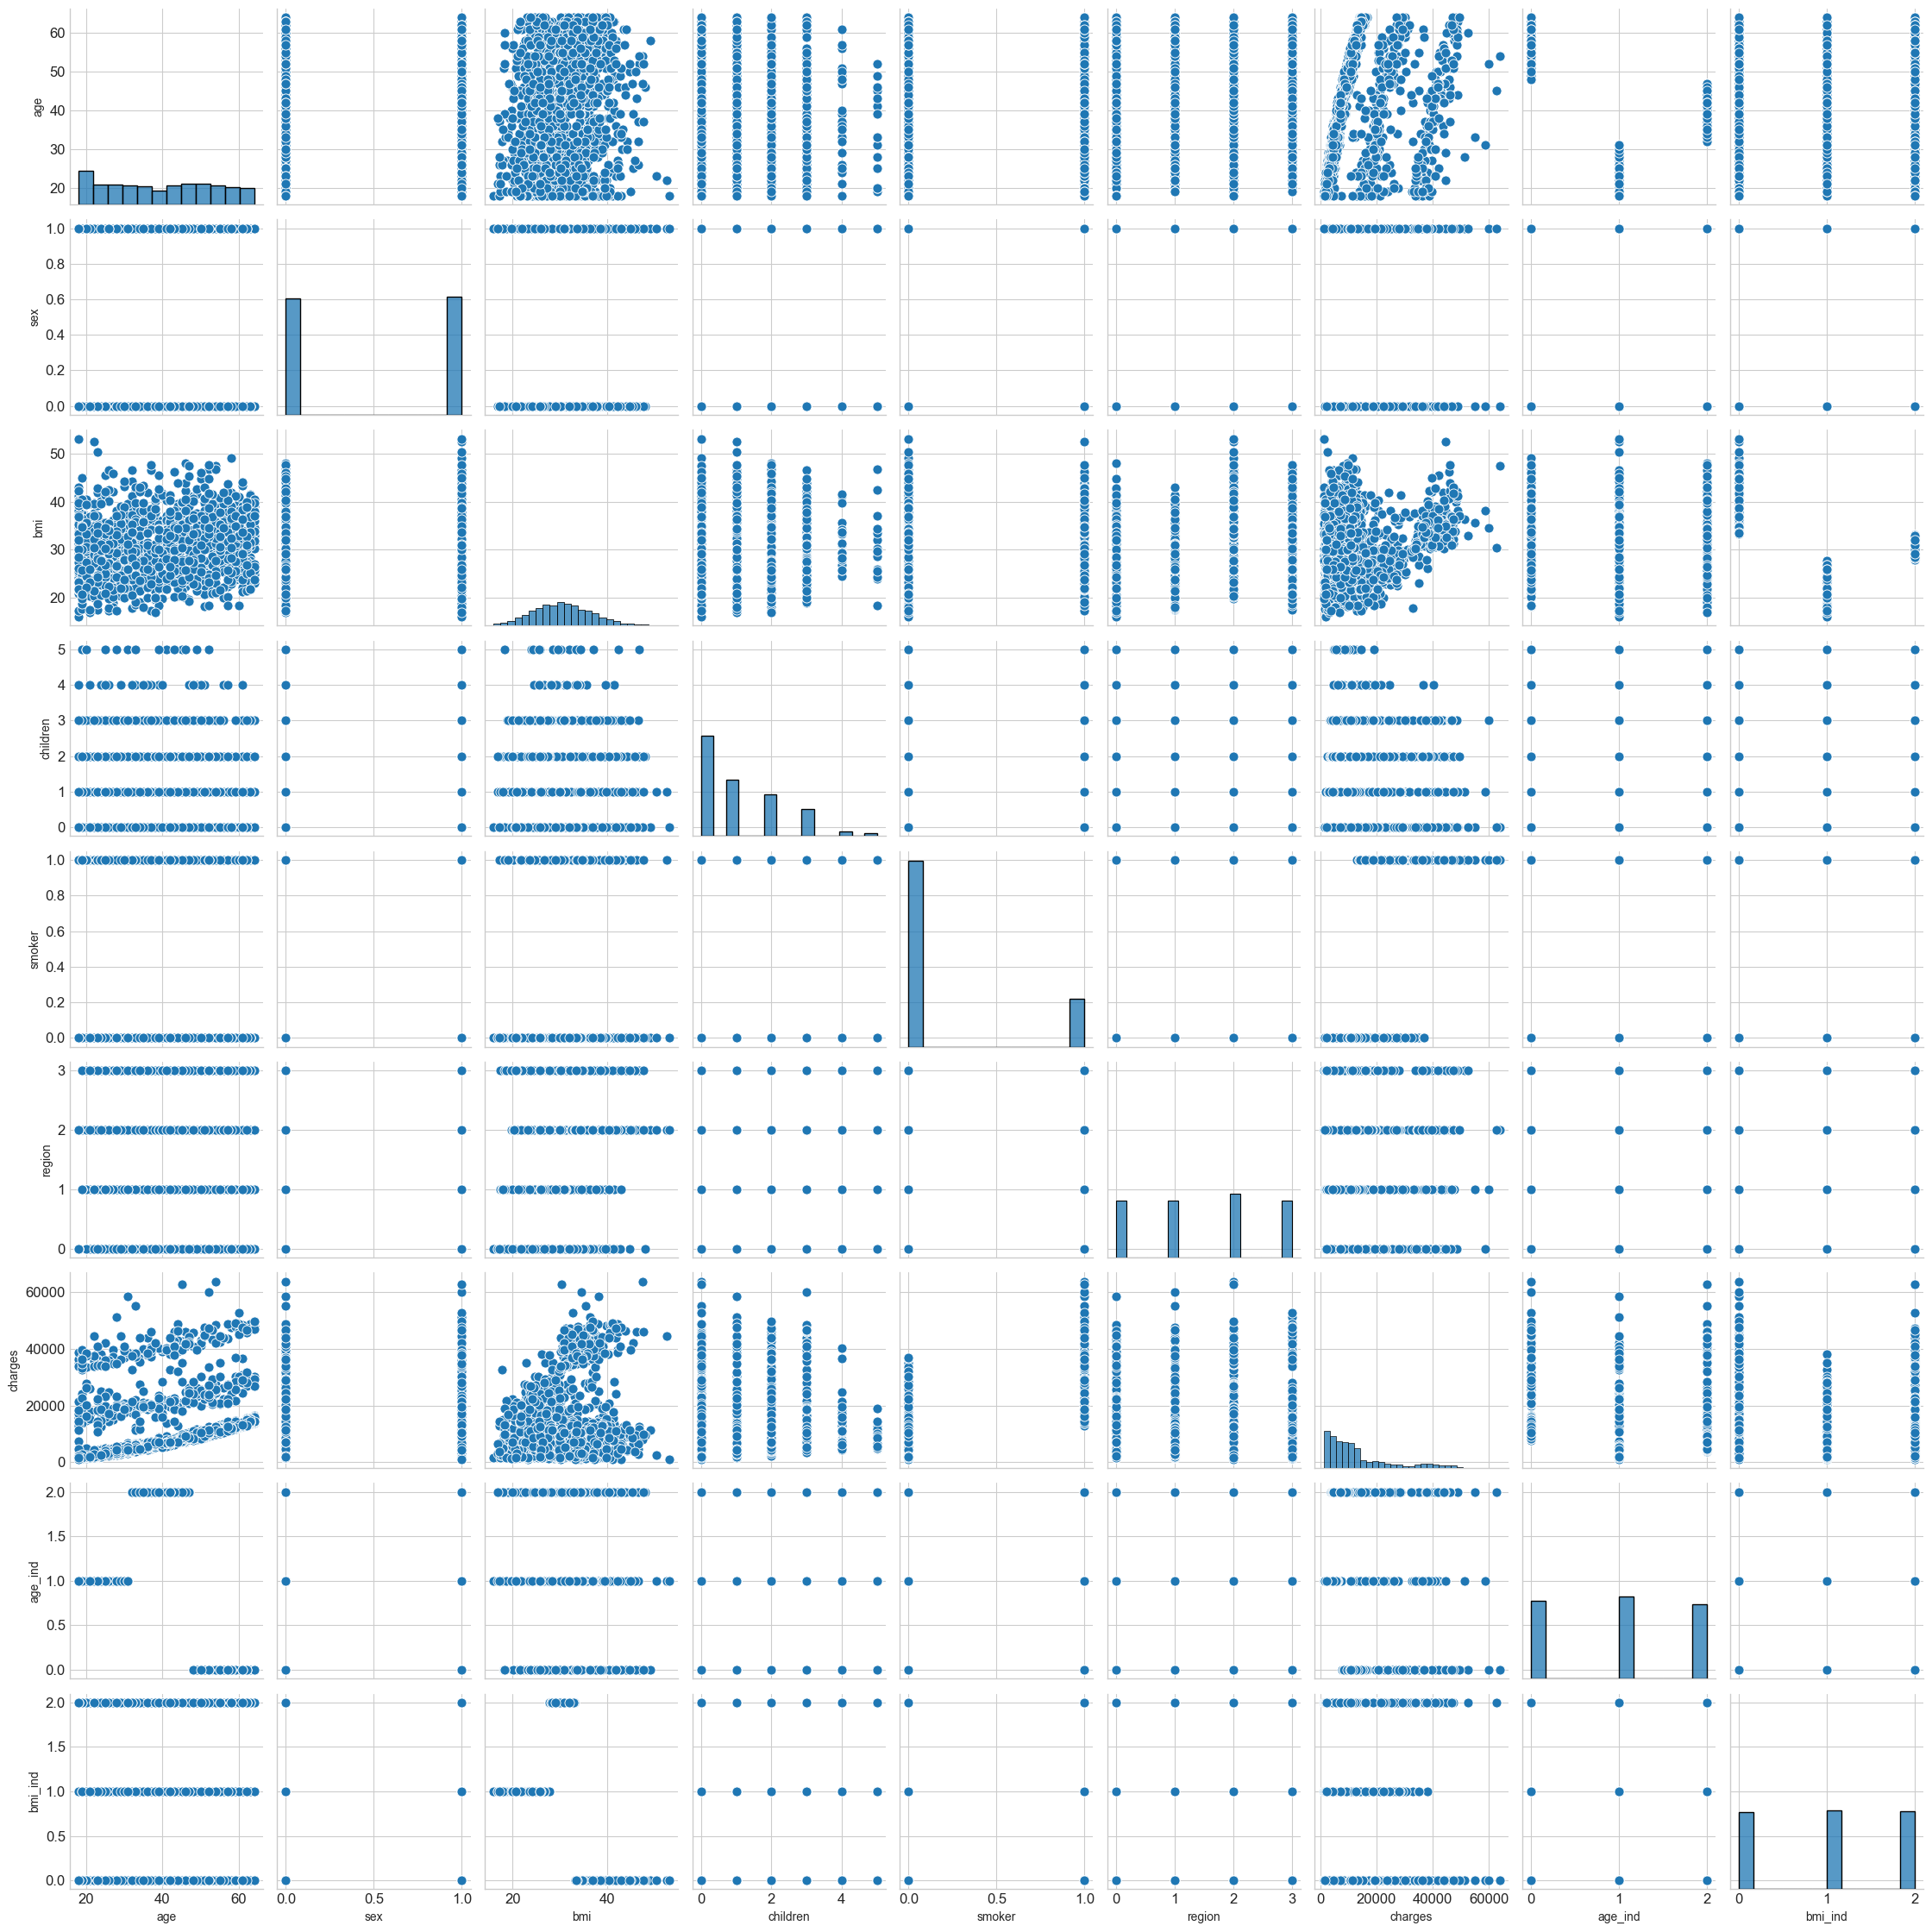

In [27]:
sns.pairplot(df_clean)

## c. Power Transforming

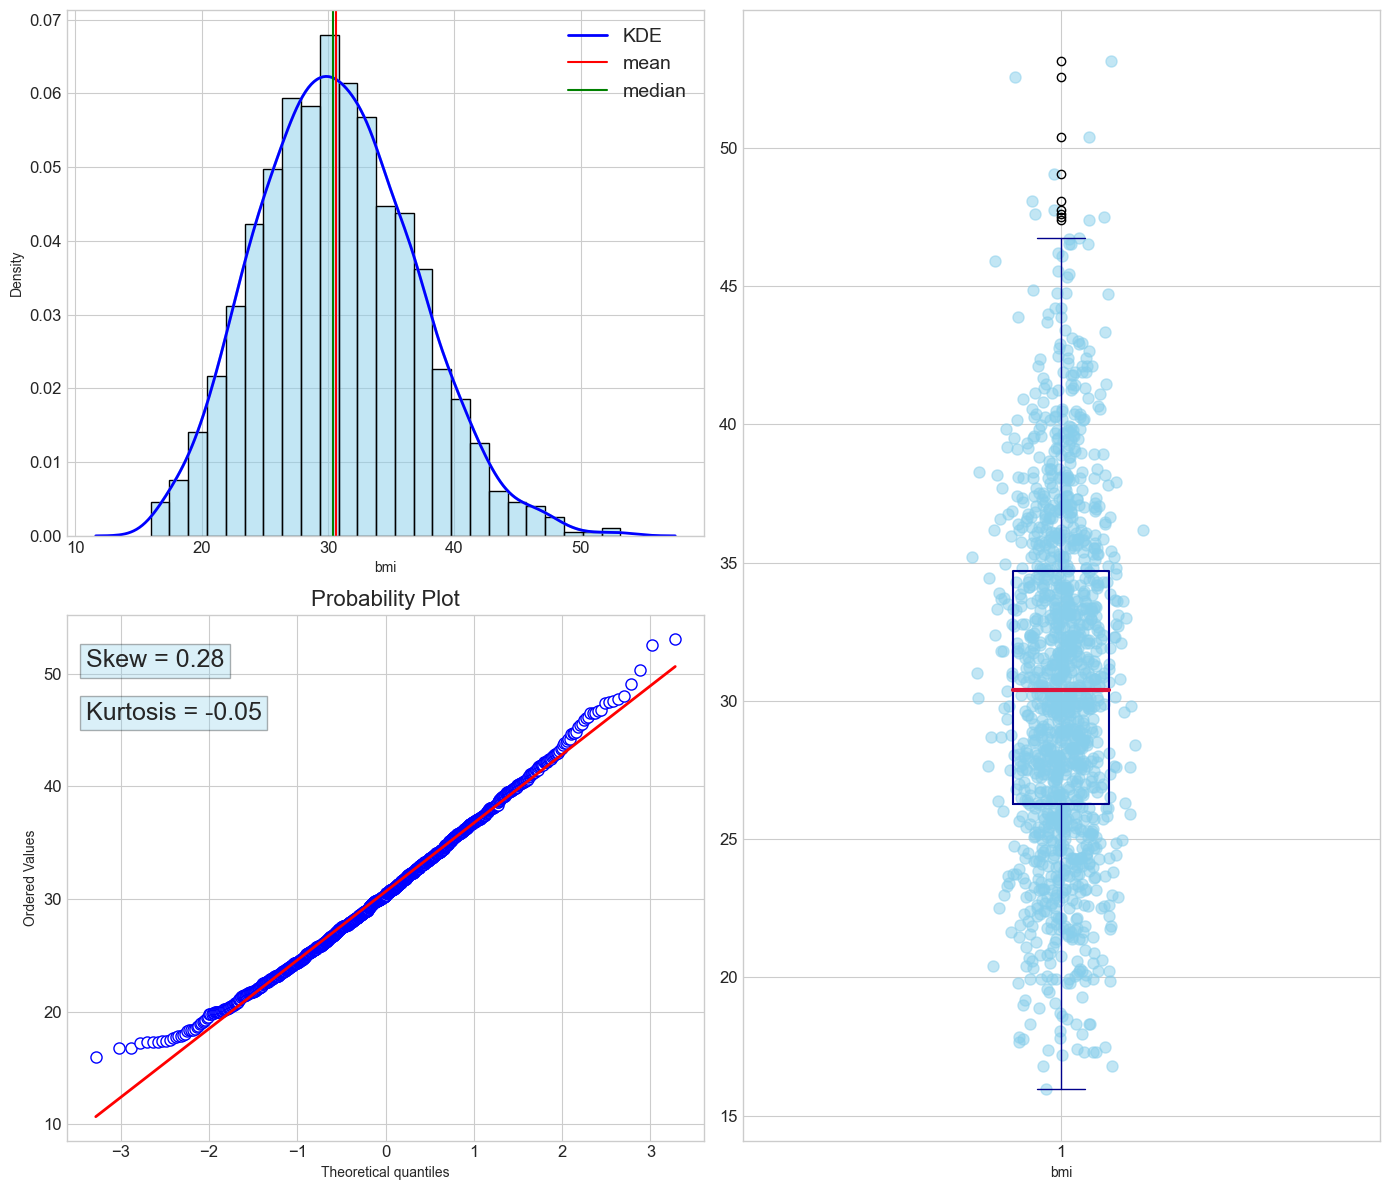

In [28]:
distribution_plot(df_clean.bmi)

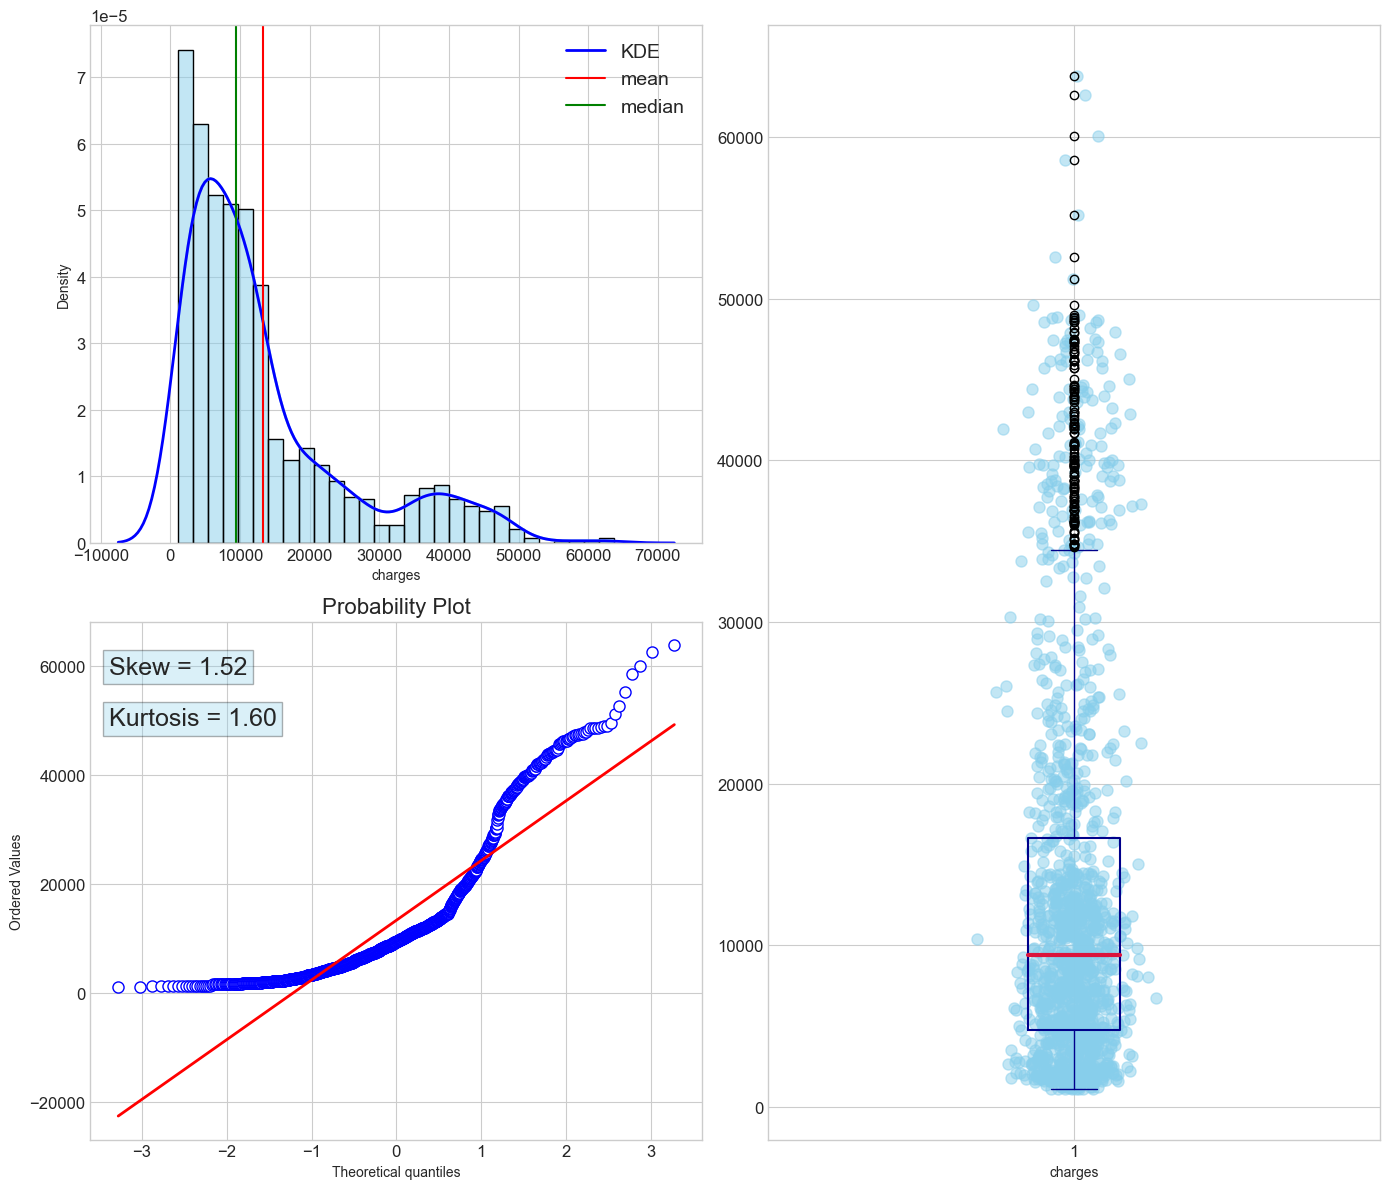

In [29]:
distribution_plot(df_clean.charges)

In [30]:
charges, lmb = boxcox(df_clean.charges)

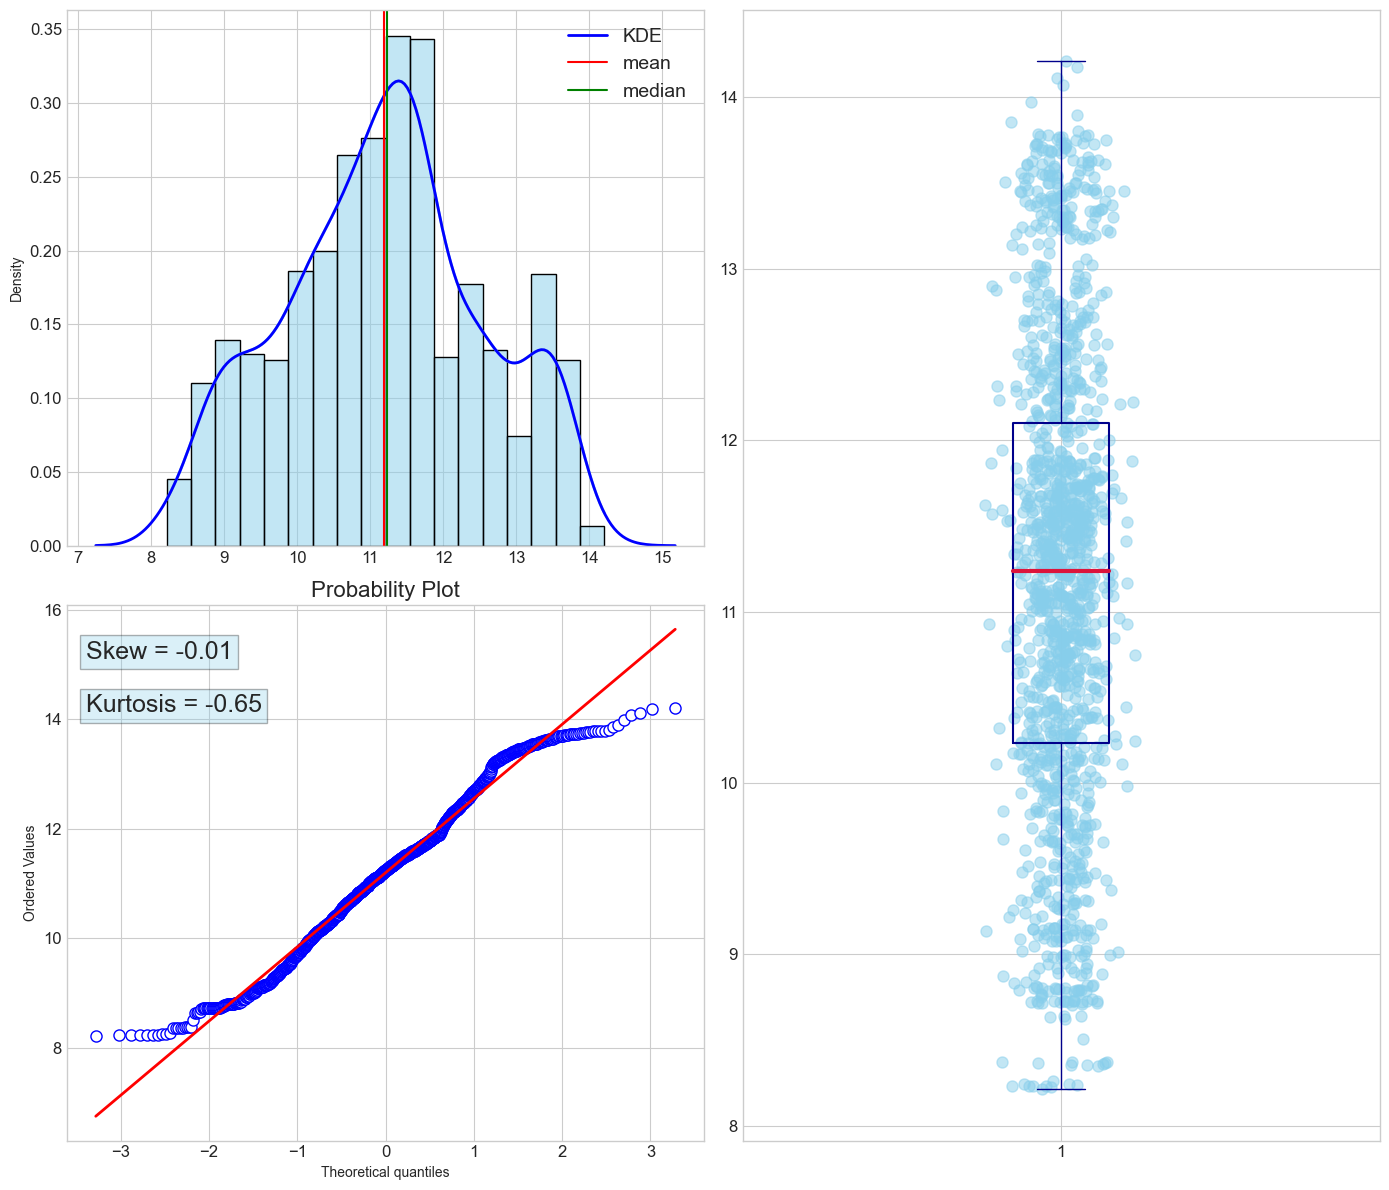

In [31]:
distribution_plot(pd.Series(charges))

## d. Handling with Outlires 

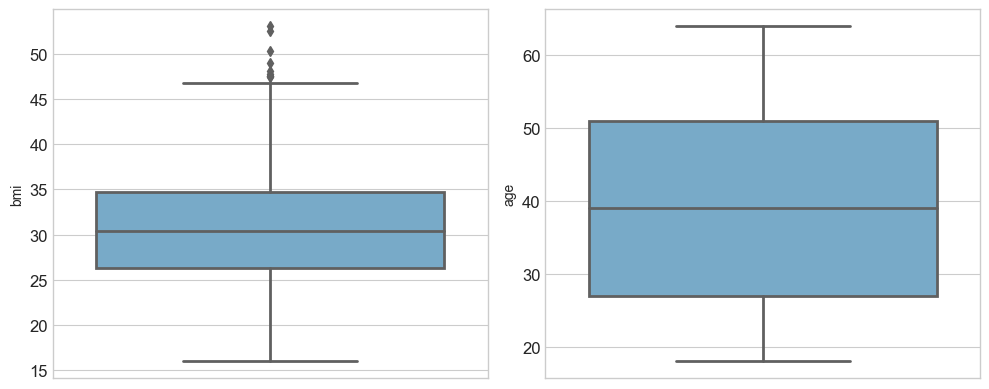

In [32]:
features = ['bmi', 'age']
fig, ax = plt.subplots(figsize=(10,4))
for i,feature in enumerate(features):
    plt.subplot(1,2,i+1)
    sns.boxplot(data=df_clean, y=feature, palette='Blues')

## e. Scaling Numerical Features

In [33]:
scaler = StandardScaler()
df_scaled = pd.DataFrame(data=scaler.fit_transform(df_clean[['bmi','age']]), columns=['bmi', 'age'])
df_scaled.describe().round(3)

,bmi,age
count,1337.000,1337.000
mean,-0.000,-0.000
std,1.000,1.000
min,-2.411,-1.512
25%,-0.717,-0.871
50%,-0.043,-0.016
75%,0.662,0.839
max,3.684,1.765


# 6. Machine Learning Algorythms

## a. Split to Train and Test data

In [34]:
X = df_clean.drop(['charges'], axis=1)
y = df_clean['charges']

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size=0.2)

In [36]:
kf = KFold(n_splits=10, shuffle=True, random_state=12)

## b. Regression Algorythms 

- Linear Support Vector Regression
- Lasso
- Ridge
- XGBRegressor
- RandomForestRegressor
- GradientBoostingRegressor

### Linear Support Regression

Linear Support Vector Regression (Linear SVR) is a type of regression algorithm that uses Support Vector Machine (SVM) principles to predict continuous numerical values. Unlike traditional regression algorithms, Linear SVR works by creating a linear function that represents the relationship between the input variables and the output variable. The linear function is used to make predictions for new data points by calculating the dot product between the input variables and the coefficients of the linear function.

In [37]:
svr = LinearSVR()
model_score(svr, X,y,kf)


LinearSVR model

 ROOT MEAN SQUARED ERROR:	12472.38
 MEAN ABSOLUTE ERROR:		7511.42
 P-VALUE:			1.1e-07

 R2 SCORE:			-15.24 %


### Lasso

Lasso Regression is a variant of linear regression that uses L1 regularization to prevent overfitting and improve the accuracy of the model. In Lasso Regression, the objective is to minimize the sum of the squared residuals between the predicted and actual values of the dependent variable, while also penalizing the absolute values of the coefficients of the independent variables.

In [38]:
las = Lasso()
model_score(las, X,y,kf)

Lasso model

 ROOT MEAN SQUARED ERROR:	6091.28
 MEAN ABSOLUTE ERROR:		4237.50
 P-VALUE:			2.0e-100

 R2 SCORE:			80.20 %


### Ridge

Ridge regression is a model tuning method that is used to analyse any data that suffers from multicollinearity. This method performs L2 regularization. When the issue of multicollinearity occurs, least-squares are unbiased, and variances are large, this results in predicted values being far away from the actual values. 

In [39]:
rid = Ridge()
model_score(rid, X,y,kf)

Ridge model

 ROOT MEAN SQUARED ERROR:	6092.03
 MEAN ABSOLUTE ERROR:		4253.62
 P-VALUE:			2.0e-100

 R2 SCORE:			80.10 %


### XGBRegressor

 XGBRegressor uses the XGBoost (Extreme Gradient Boosting) library, which is an optimized implementation of the Gradient Boosting algorithm. It is designed to be highly efficient, scalable and provide high prediction accuracy.

The model works by fitting weak decision trees to the training data in a sequential manner. Each decision tree attempts to capture the errors of the previous tree, thereby improving the overall accuracy of the ensemble model. The objective of XGBRegressor is to minimize the mean squared error between the predicted and actual values of the target variable.

In [40]:
xgb = XGBRegressor()
model_score(xgb, X,y,kf)

XGBRegressor model

 ROOT MEAN SQUARED ERROR:	5331.56
 MEAN ABSOLUTE ERROR:		2729.76
 P-VALUE:			6.8e-122

 R2 SCORE:			87.44 %


### RandomForestRegressor

RandomForestRegressor is a type of ensemble learning algorithm that combines multiple decision trees to create a more accurate and stable prediction model.

The model works by building a large number of decision trees, where each tree is constructed using a random subset of features and training data. The prediction of the model is obtained by averaging the predictions of all the decision trees.

In [41]:
rf = RandomForestRegressor()
model_score(rf, X,y,kf)

RandomForestRegressor model

 ROOT MEAN SQUARED ERROR:	4906.77
 MEAN ABSOLUTE ERROR:		2531.49
 P-VALUE:			3.9e-127

 R2 SCORE:			88.48 %


### GradientBoostingRegressor

Gradient Boosting Regressor (GBR) is a type of boosting algorithm that builds an ensemble of weak decision trees in a sequential manner.

The model works by fitting a decision tree to the training data and calculating the errors or residuals between the predicted values and the actual values. In the next step, a new decision tree is built to predict the residuals of the previous tree, with the goal of reducing the residual error. This process is repeated iteratively until the desired level of accuracy is achieved.

In [42]:
gbr = GradientBoostingRegressor()
model_score(gbr, X,y,kf)

GradientBoostingRegressor model

 ROOT MEAN SQUARED ERROR:	4636.45
 MEAN ABSOLUTE ERROR:		2494.48
 P-VALUE:			1.7e-138

 R2 SCORE:			90.33 %


## c. Feature Importances

Text(0.5, 1.0, 'Feature Importance')

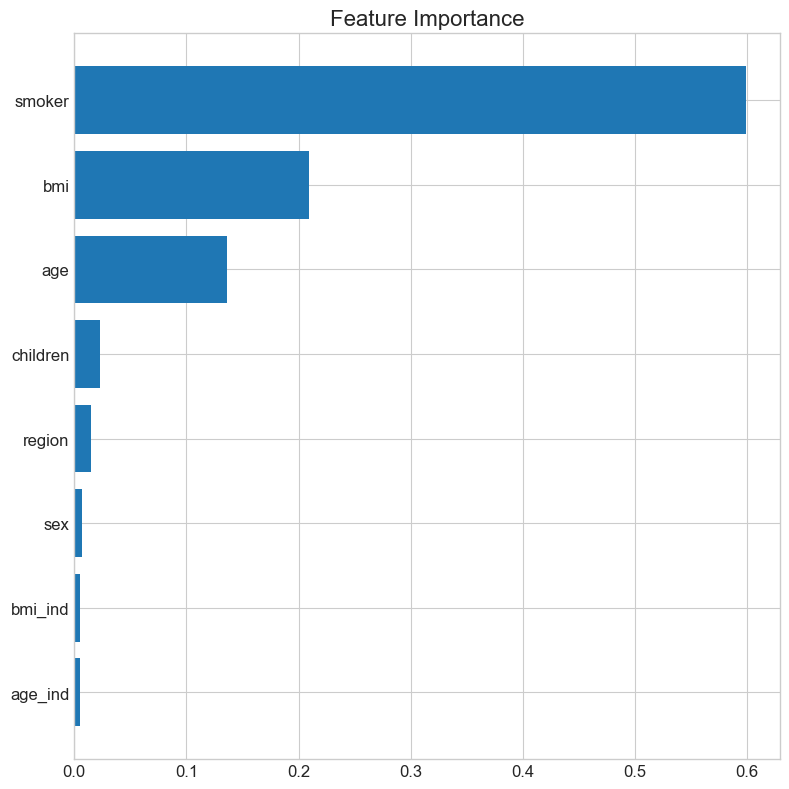

In [43]:
feature_importance = rf.feature_importances_
sorted_idx = feature_importance.argsort()
fig = plt.figure(figsize=(8, 8))
plt.barh(X.columns[sorted_idx], feature_importance[sorted_idx])
plt.title('Feature Importance')

## e. Building RandomForestRegressor Model

In [44]:
X = df.drop(['charges', 'bmi_ind', 'age_ind', 'sex','region'], axis=1)
y = df['charges']

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size=0.2)

In [46]:
model = RandomForestRegressor(n_estimators=300,max_depth=5,criterion='squared_error')
pt = PowerTransformer()
scaler = StandardScaler()
encoder = OneHotEncoder()


num_features = ['age', 'bmi']
cat_features = ['smoker']

preprocessor = ColumnTransformer(
    transformers=[('Numerical Features', scaler, num_features),
                  ('Categorical Features', encoder, cat_features)],
    remainder='passthrough'
)

pipe = Pipeline(steps=[('preprocessor', preprocessor),('model',model)])

pipe_target = Pipeline(steps=[('scaler', scaler), ('pt', pt)])
reg = TransformedTargetRegressor(regressor=pipe, transformer=pipe_target)
reg.fit(X_train,y_train)

y_pred = reg.predict(X_test)


In [47]:
model_score(reg, X,y, kf)

TransformedTargetRegressor model

 ROOT MEAN SQUARED ERROR:	4505.61
 MEAN ABSOLUTE ERROR:		2048.35
 P-VALUE:			4.6e-138

 R2 SCORE:			90.36 %


## f. Model Visualization

In [48]:
display(reg)

TransformedTargetRegressor(regressor=Pipeline(steps=[('preprocessor',
                                                      ColumnTransformer(remainder='passthrough',
                                                                        transformers=[('Numerical '
                                                                                       'Features',
                                                                                       StandardScaler(),
                                                                                       ['age',
                                                                                        'bmi']),
                                                                                      ('Categorical '
                                                                                       'Features',
                                                                                       OneHotEncoder(),
                                                                                       ['smoker'])])),
                                                     ('model',
                                                      RandomForestRegressor(max_depth=5,
                                                                            n_estimators=300))]),
                           transformer=Pipeline(steps=[('scaler',
                                                        StandardScaler()),
                                                       ('pt',
                                                        PowerTransformer())]))

# 7. MODEL VALIDATION

## a. Residual Plot

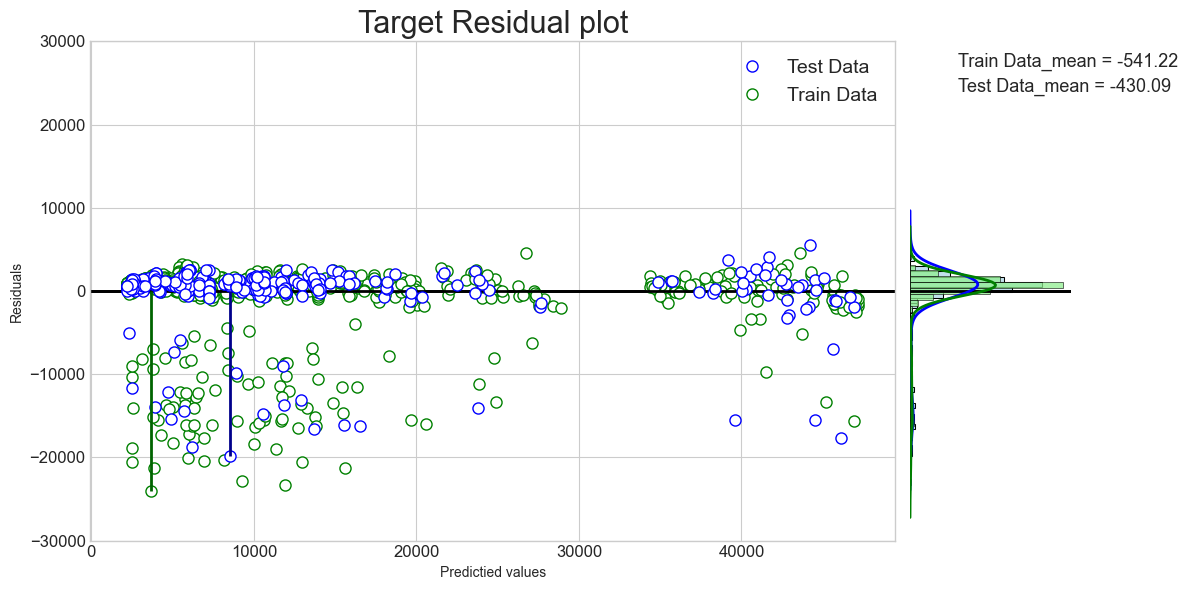

In [49]:
y_train_pred = reg.predict(X_train)
spec = gridspec.GridSpec(ncols=2, nrows=1, 
                         width_ratios=[5, 1])
fig = plt.figure(figsize=(12,6))
ax0 = fig.add_subplot(spec[0])
ax1 = fig.add_subplot(spec[1])
residual_plot(y_test, y_pred,fig, ax0, ax1, 'blue', 'Test Data',2)
residual_plot(y_train, y_train_pred,fig, ax0, ax1, 'green', 'Train Data',1)

## b. Check Linearity and Homoscedasticity

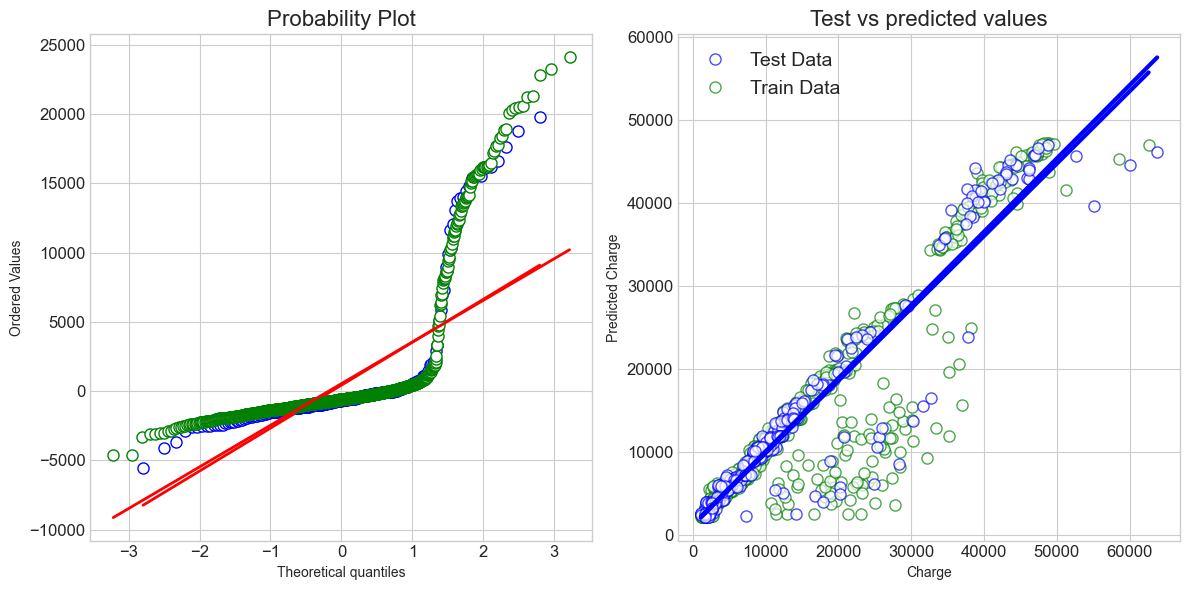

In [50]:
fig, (ax0, ax1) = plt.subplots(1,2, figsize=(12,6))
qq_plot(y_test, y_pred, 'blue',2, 'Test Data', ax0, ax1)
qq_plot(y_train,y_train_pred , 'green',1, 'Train Data', ax0, ax1)

## c. Final Results

In [51]:
results = pd.DataFrame({'Real Charge': y_test.values, 'RandomForestRegressor': y_pred})

In [52]:
from IPython.display import HTML

HTML('''
        <style>
            .results th { background-color: lightgray; }
            .results tbody tr:nth-child(even) { background-color: skyblue; }
        </style>
     ''' 
     #+ results.to_html(classes="results")
    )

In [53]:
HTML(results.head(10).round(0).to_html(classes='results'))

,Real Charge,RandomForestRegressor
0,8689.0,10498.0
1,5709.0,6703.0
2,11437.0,10651.0
3,38746.0,41594.0
4,4463.0,5578.0
5,9305.0,10109.0
6,38512.0,38258.0
7,2150.0,2276.0
8,7346.0,8219.0
9,10264.0,10542.0


In [54]:
res_sort = results.sort_values(by='Real Charge')
rf_perct = res_sort[['Real Charge', 'RandomForestRegressor']].pct_change(axis=0)['Real Charge']*100

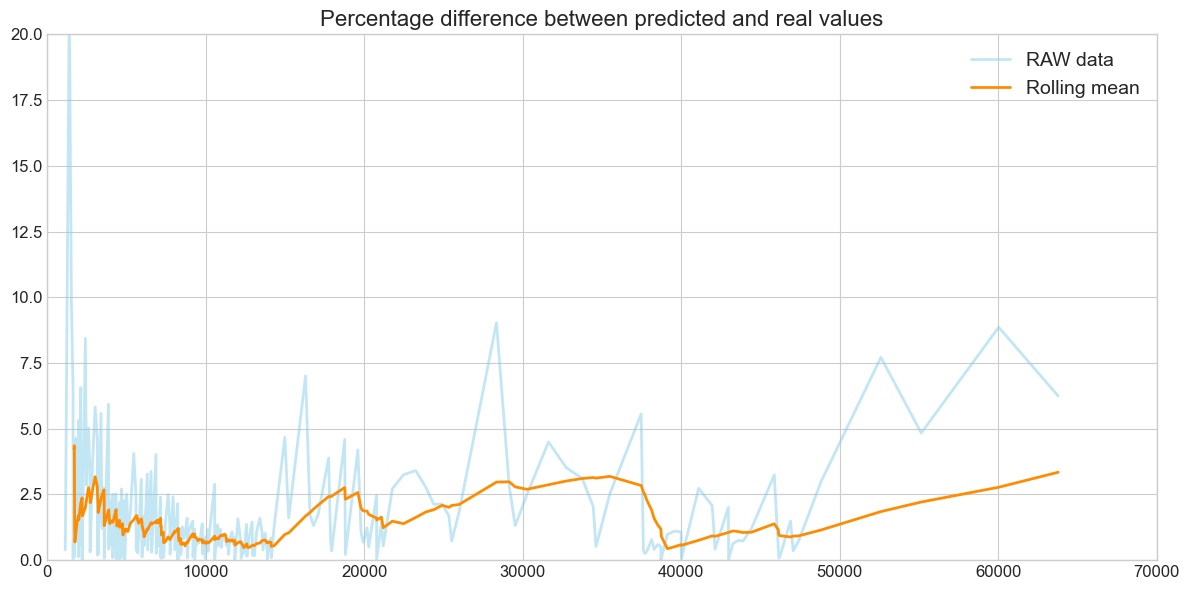

In [55]:
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(res_sort['Real Charge'], rf_perct, c='skyblue',alpha=0.5, label ='RAW data')
ax.plot(res_sort['Real Charge'], rf_perct.rolling(10).mean(), c='darkorange', label ='Rolling mean')
ax.set_ylim(0,20)
ax.set_xlim(0,70000)
ax.set_title('Percentage difference between predicted and real values')
plt.legend()

# 8. Pickling the Model for Deployment

In [ ]:
reg_model = pickle.dump(reg, open('model_reg.pkl', 'wb'))

TypeError: 'module' object is not callable